# GARBAGE IGNORE ALL OF THIS CRAP

In [ ]:
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['from', 'to']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email
def parse_into_emails(messages):
    emails = [parse_raw_message(message) for message in messages]
    return {
        'body': map_to_list(emails, 'body'), 
        'to': map_to_list(emails, 'to'), 
        'from_': map_to_list(emails, 'from')
    }

In [15]:
import pandas as pd
import re

In [ ]:
df = pd.read_csv("df1.csv")[["file", "message"]]
df.head()

In [ ]:
df.message[0]

In [ ]:
#Simple Function to Clean Text
def clean_text(text):
    '''
    Utility function to remove new lines, carats, fix file paths.
    '''
    #text = text.lower().strip()
    text = text.strip()
    text = re.sub("[\\\]", '/', text)
    return ' '.join(re.sub('[<>]', ' ', text).split())

In [ ]:
clean_text(df.message[0])

In [ ]:
test = clean_text(df.message[0])
re.compile("\n").split(df.message[1])

In [ ]:
test = re.compile("\n").split(df.message[1])
test

In [ ]:
test[0:test.index("")]

In [ ]:
"".join(test[test.index(""):len(test)])

In [ ]:
def parseEmail(email):
    emailDict = {}
    
    #split on new line
    email = re.sub("\n\t", "", email)
    parsed = re.compile("\n").split(email)
    
    headers = parsed[0:parsed.index("")]
    body = "".join(parsed[parsed.index(""):len(parsed)]).strip()
    
    for header in headers:
        headParsed = header.split(":")
        emailDict[headParsed[0]] = re.sub("[\\\]", '/', headParsed[1].strip()) 
    
    emailDict["body"] = re.sub("[\\\]", '/', body) 
    
    return emailDict

In [ ]:
parseEmail(df.message[0])

In [ ]:
emailList = []
for message in df.message.values:
    emailList.append(parseEmail(message))

In [ ]:
message2 = re.sub("\n\t", "", message)
parsed = re.compile("\n").split(message2)

headers = parsed[0:parsed.index("")]
body = "".join(parsed[parsed.index(""):len(parsed)]).strip()

In [ ]:
headers

In [ ]:
emailDF = pd.DataFrame(emailList, columns = emailList[0].keys())
emailDF.head()

In [ ]:
headerList = ['Message-ID', 'Date', 'From', 'To', 'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName']

In [ ]:
headers = df.message[0].split("\n\n")[0]
body = df.message[0].split("\n\n")[1]

In [ ]:
headers.split("Message-ID:")[1].split("Date:")

In [ ]:
emailDict = {}
for i in range(len(headerList)):
    first = headerList[i]
    
    if (i+1>=len(headerList)):
        parsed = headers.split(first+":")[1].strip()
        emailDict[first] = parsed
    else:
        second = headerList[i+1]
        parsed = headers.split(first+":")[1].split(second + ":")[0].strip()        
        emailDict[first] = parsed
emailDict

# START HERE

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv("df1.csv")[["file", "message"]]

In [3]:
def parseEmail(email, headerList):
    headers = email.split("\n\n")[0]
    body = re.sub("\n", "", " ".join(email.split("\n\n")[1:]))
    
    emailDict = {}
    for i in range(len(headerList)):
        first = headerList[i]

        if (i+1>=len(headerList)):
            parsed = headers.split(first+":")[1].strip()
            emailDict[first] = parsed
        else:
            second = headerList[i+1]
            parsed = headers.split(first+":")[1].split(second + ":")[0].strip()        
            emailDict[first] = parsed
    
    emailDict["body"] = body
    
    return emailDict

In [4]:
headerList = ['Message-ID', 'Date', 'From', 'To', 'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName']
emailList = []
for message in df.message.values:
    emailList.append(parseEmail(message, headerList))

In [5]:
emailDF = pd.DataFrame(emailList, columns = emailList[0].keys())
emailDF.head(20)

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy, Can you send me a schedule of the sala..."
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.
5,<30965995.1075863688265.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Greg, How about either next Tuesday or Thursd..."
6,<16254169.1075863688286.JavaMail.evans@thyme>,"Tue, 22 Aug 2000 07:44:00 -0700 (PDT)",phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"david.l.johnson@enron.com, John Shafer",,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Please cc the following distribution list with...
7,<17189699.1075863688308.JavaMail.evans@thyme>,"Fri, 14 Jul 2000 06:59:00 -0700 (PDT)",phillip.allen@enron.com,joyce.teixeira@enron.com,Re: PRC review - phone calls,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Joyce Teixeira,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,any morning between 10 and 11:30
8,<20641191.1075855687472.JavaMail.evans@thyme>,"Tue, 17 Oct 2000 02:26:00 -0700 (PDT)",phillip.allen@enron.com,mark.scott@enron.com,Re: High Speed Internet Access,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Mark Scott,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,1. login: pallen pw: ke9davis I don't think ...
9,<30795301.1075855687494.JavaMail.evans@thyme>,"Mon, 16 Oct 2000 06:44:00 -0700 (PDT)",phillip.allen@enron.com,zimam@enron.com,FW: fixed forward or other Collar floor gas pr...,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,zimam@enron.com,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,---------------------- Forwarded by Phillip K ...


In [6]:
print(len(emailDF))

3333


In [7]:
emailDF.body[9]

'---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/16/2000 01:42 PM --------------------------- "Buckner, Buck" <buck.buckner@honeywell.com> on 10/12/2000 01:12:21 PMTo: "\'Pallen@Enron.com\'" <Pallen@Enron.com>cc:  Subject: FW: fixed forward or other Collar floor gas price terms Phillip, > As discussed  during our phone conversation, In a Parallon 75 microturbine> power generation deal for a national accounts customer, I am developing a> proposal to sell power to customer at fixed or collar/floor price. To do> so I need a corresponding term gas price for same. Microturbine is an> onsite generation product developed by Honeywell to generate electricity> on customer site (degen). using natural gas. In doing so,  I need your> best fixed price forward gas price deal for 1, 3, 5, 7 and 10 years for> annual/seasonal supply to microturbines to generate fixed kWh for> customer. We have the opportunity to sell customer kWh \'s using> microturbine or sell them turbines themselve

In [8]:
re.sub("\n", "", " ".join(df.message[3].split("\n\n")[1:]))

'Randy,  Can you send me a schedule of the salary and level of everyone in the scheduling group.  Plus your thoughts on any changes that need to be made.  (Patti S for example) Phillip'

In [9]:
from textblob import TextBlob

In [10]:
emailDF["Sentiment"] = [TextBlob(x).sentiment.polarity for x in emailDF.body]

In [11]:
buckets = []
for sentiment in emailDF.Sentiment:
    if sentiment > 0:
        buckets.append(1)
    elif sentiment < 0:
        buckets.append(-1)
    else:
        buckets.append(0)
emailDF["Bucket"] = buckets

In [17]:
emailDF["DateParse"] = pd.to_datetime(emailDF.Date)
emailDF = emailDF.sort_values("DateParse").reset_index(drop=True)
emailDF

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body,Sentiment,Bucket,DateParse
0,<12860336.1075855675177.JavaMail.evans@thyme>,"Mon, 31 Dec 1979 16:00:00 -0800 (PST)",phillip.allen@enron.com,"john.lavorato@enron.com, beth.perlman@enron.co...",systems wish list,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"John J Lavorato, Beth Perlman, Hunter S Shivel...",,,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,Allen-P,pallen.nsf,attached is the systems wish list for the gas ...,0.000000,0,1979-12-31 16:00:00-08:00
1,<17449361.1075855672476.JavaMail.evans@thyme>,"Mon, 31 Dec 1979 16:00:00 -0800 (PST)",phillip.allen@enron.com,maryrichards7@hotmail.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"""mary richards"" <maryrichards7@hotmail.com> @ ...",,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,"Mary, It is OK to buy a carpet shampooer. Abo...",0.500000,1,1979-12-31 16:00:00-08:00
2,<16041239.1075855708564.JavaMail.evans@thyme>,"Mon, 31 Dec 1979 16:00:00 -0800 (PST)",phillip.allen@enron.com,c@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,C,,,\Phillip_Allen_June2001\Notes Folders\Discussi...,Allen-P,pallen.nsf,"George, In response to your ideas Time and cos...",0.175000,1,1979-12-31 16:00:00-08:00
3,<27903020.1075855669931.JavaMail.evans@thyme>,"Mon, 31 Dec 1979 16:00:00 -0800 (PST)",phillip.allen@enron.com,"john.lavorato@enron.com, beth.perlman@enron.co...",systems wish list,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"John J Lavorato, Beth Perlman, Hunter S Shivel...",,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,attached is the systems wish list for the gas ...,0.000000,0,1979-12-31 16:00:00-08:00
4,<12635597.1075855702772.JavaMail.evans@thyme>,"Mon, 31 Dec 1979 16:00:00 -0800 (PST)",phillip.allen@enron.com,scott.tholan@enron.com,Re: Carlsbad/El Paso: Aug 23 Update: Press Con...,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Scott Tholan,,,\Phillip_Allen_June2001\Notes Folders\All docu...,Allen-P,pallen.nsf,"Scott, Thanks for the email. I have two ques...",0.200000,1,1979-12-31 16:00:00-08:00
5,<13537630.1075855669909.JavaMail.evans@thyme>,"Mon, 31 Dec 1979 16:00:00 -0800 (PST)",phillip.allen@enron.com,jsmith@austintx.com,Re: MISSION SOUTH,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"""Jeff Smith"" <jsmith@austintx.com> @ ENRON",,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,"Jeff, I want to bid $2.8 for sagewood with a ...",-0.166667,-1,1979-12-31 16:00:00-08:00
6,<29770699.1075855669609.JavaMail.evans@thyme>,"Mon, 31 Dec 1979 16:00:00 -0800 (PST)",phillip.allen@enron.com,"stephen.harrington@enron.com, mary@enron.com",,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"Stephen Harrington, Mary",,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,EOL report for TV in conference on 33 Cash -He...,0.000000,0,1979-12-31 16:00:00-08:00
7,<12929996.1075855668941.JavaMail.evans@thyme>,"Mon, 31 Dec 1979 16:00:00 -0800 (PST)",phillip.allen@enron.com,muller@thedoghousemail.com,Re: (No Subject),1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,muller@thedoghousemail.com,,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,How is your racing going? What category are y...,0.000000,0,1979-12-31 16:00:00-08:00
8,<23724536.1075855675391.JavaMail.evans@thyme>,"Mon, 31 Dec 1979 16:00:00 -0800 (PST)",phillip.allen@enron.com,"stephen.harrington@enron.com, mary@enron.com",,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"Stephen Harrington, Mary",,,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,Allen-P,pallen.nsf,EOL report for TV in conference on 33 Cash -He...,0.000000,0,1979-12-31 16:00:00-08:00
9,<5722531.1075855698441.JavaMail.evans@thyme>,"Mon, 31 Dec 1979 16:00:00 -0800 (PST)",phillip.allen@enron.com,c@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K All

In [13]:
emailDF.groupby("Bucket").count().body

Bucket
-1     566
 0     665
 1    2102
Name: body, dtype: int64

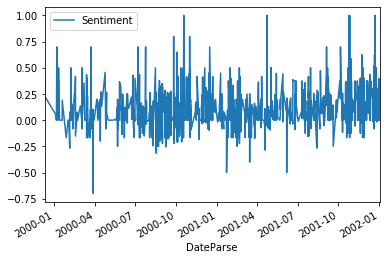

In [16]:
emailDF[10:].plot(x="DateParse", y="Sentiment")